Modelling various kinds of trial-to-trial nonstationarities. Overview for review paper.
Anne Urai, 2024

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




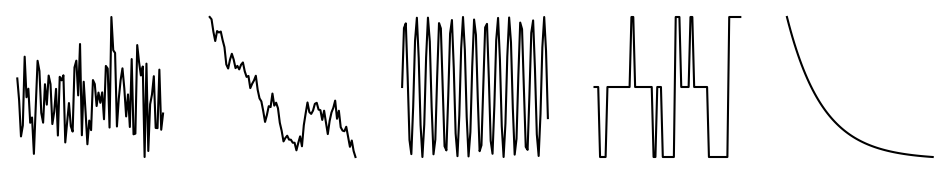

In [ ]:
n_trials = 80
random_seed = 123456
rng = np.random.default_rng(random_seed) # for hmm
np.random.seed(random_seed)

# gaussian random noise
random_noise = np.random.normal(0, 1, n_trials)

# autoregressive
drift = [0]
for i in range(1,n_trials):
    drift.append(drift[i-1] + random_noise[i])

# sine wave
oscillation = np.sin(range(n_trials))

# hmm
transition_matrix = np.matrix('0.95, 0.01, 0.04;  0.11, 0.86, 0.03;  0.05, 0.20, 0.75') # from Ashwood et al
states = [1]
for i in range(1, n_trials):
    prob = rng.multinomial(1, transition_matrix[states[i-1]], size=1)
    next_state = np.where(prob[0] == 1)[0]
    #print(prob)
    states.append(next_state[0])

# systematic update
update = [1]
l = 0.95
for i in range(1, n_trials):
    update.append(l* update[i-1])


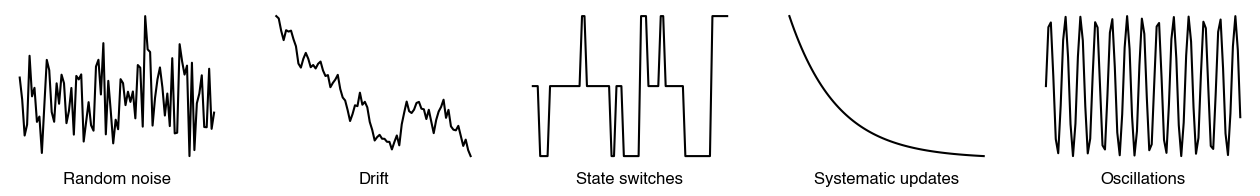

In [192]:
fig, ax = plt.subplots(1,5, figsize=(16,2))
ax[0].plot(range(n_trials), random_noise, color='k')
ax[1].plot(range(n_trials), drift, color='k')
ax[2].plot(range(n_trials), states, color='k')
ax[3].plot(range(n_trials), update, color='k')
ax[4].plot(range(n_trials), oscillation, color='k')

axis_names = ['Random noise', 'Drift', 'State switches', 'Systematic updates', 'Oscillations']
for axi, a in enumerate(ax):
    a.axis('off') 
    a.text(0.5, -0.1, axis_names[axi], 
           fontname='Helvetica', fontsize=12,
           horizontalalignment='center', verticalalignment='center', transform=a.transAxes)

fig.savefig('timecourses.pdf', transparent=True)
